## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LR = 1e-5
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [ 0.3,0.5,0.95]
NESTEROV=[True,False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM :
    for n in NESTEROV :
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with momentum = {m} ,and nesterov = {n}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LR, nesterov=n, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"exp-momentum-{m}-nesterov-{n}" 
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with momentum = 0.3 ,and nesterov = True


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadc

50000/50000 [==============================] - 7s 149us/step - loss: 2.2907 - acc: 0.1494 - val_loss: 2.2885 - val_acc: 0.1577
Epoch 28/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.2890 - acc: 0.1511 - val_loss: 2.2869 - val_acc: 0.1584
Epoch 29/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2875 - acc: 0.1525 - val_loss: 2.2854 - val_acc: 0.1603
Epoch 30/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2860 - acc: 0.1538 - val_loss: 2.2839 - val_acc: 0.1622
Epoch 31/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.2845 - acc: 0.1553 - val_loss: 2.2825 - val_acc: 0.1640
Epoch 32/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.2831 - acc: 0.1567 - val_loss: 2.2811 - val_acc: 0.1646
Epoch 33/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.2817 - acc: 0.1581 - val_loss: 2.2797 - val_acc: 0.1661
Epoch 34/50
50000/50000 [==============

Epoch 28/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.2595 - acc: 0.1805 - val_loss: 2.2570 - val_acc: 0.1846
Epoch 29/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.2577 - acc: 0.1813 - val_loss: 2.2553 - val_acc: 0.1853
Epoch 30/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2561 - acc: 0.1822 - val_loss: 2.2536 - val_acc: 0.1865
Epoch 31/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.2544 - acc: 0.1839 - val_loss: 2.2520 - val_acc: 0.1868
Epoch 32/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2528 - acc: 0.1855 - val_loss: 2.2504 - val_acc: 0.1882
Epoch 33/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2512 - acc: 0.1863 - val_loss: 2.2488 - val_acc: 0.1894
Epoch 34/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.2496 - acc: 0.1876 - val_loss: 2.2473 - val_acc: 0.1899
Epoch 35/50
50000/50

50000/50000 [==============================] - 13s 253us/step - loss: 2.2473 - acc: 0.1636 - val_loss: 2.2456 - val_acc: 0.1676
Epoch 29/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.2452 - acc: 0.1665 - val_loss: 2.2435 - val_acc: 0.1702
Epoch 30/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.2432 - acc: 0.1692 - val_loss: 2.2415 - val_acc: 0.1741
Epoch 31/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.2412 - acc: 0.1713 - val_loss: 2.2395 - val_acc: 0.1767
Epoch 32/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.2392 - acc: 0.1735 - val_loss: 2.2375 - val_acc: 0.1780
Epoch 33/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.2373 - acc: 0.1752 - val_loss: 2.2356 - val_acc: 0.1809
Epoch 34/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.2353 - acc: 0.1776 - val_loss: 2.2337 - val_acc: 0.1825
Epoch 35/50
50000/50000 [=======

50000/50000 [==============================] - 13s 253us/step - loss: 2.2608 - acc: 0.1622 - val_loss: 2.2599 - val_acc: 0.1624
Epoch 29/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.2589 - acc: 0.1640 - val_loss: 2.2580 - val_acc: 0.1643
Epoch 30/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2570 - acc: 0.1661 - val_loss: 2.2561 - val_acc: 0.1666
Epoch 31/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.2551 - acc: 0.1685 - val_loss: 2.2542 - val_acc: 0.1685
Epoch 32/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.2532 - acc: 0.1703 - val_loss: 2.2524 - val_acc: 0.17023 - a
Epoch 33/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.2513 - acc: 0.1724 - val_loss: 2.2506 - val_acc: 0.17260s - loss: 2.2510 - acc: 
Epoch 34/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.2495 - acc: 0.1742 - val_loss: 2.2487 - val_acc: 0.1748
Ep

50000/50000 [==============================] - 21s 423us/step - loss: 2.0215 - acc: 0.2920 - val_loss: 2.0207 - val_acc: 0.2952
Epoch 29/50
50000/50000 [==============================] - 30s 593us/step - loss: 2.0161 - acc: 0.2931 - val_loss: 2.0154 - val_acc: 0.2983
Epoch 30/50
50000/50000 [==============================] - 30s 608us/step - loss: 2.0109 - acc: 0.2946 - val_loss: 2.0103 - val_acc: 0.3000
Epoch 31/50
50000/50000 [==============================] - 29s 581us/step - loss: 2.0059 - acc: 0.2971 - val_loss: 2.0054 - val_acc: 0.3009
Epoch 32/50
50000/50000 [==============================] - 30s 598us/step - loss: 2.0009 - acc: 0.2989 - val_loss: 2.0006 - val_acc: 0.3023
Epoch 33/50
50000/50000 [==============================] - 31s 613us/step - loss: 1.9961 - acc: 0.3009 - val_loss: 1.9960 - val_acc: 0.3031
Epoch 34/50
50000/50000 [==============================] - 30s 599us/step - loss: 1.9915 - acc: 0.3030 - val_loss: 1.9914 - val_acc: 0.3056
Epoch 35/50
50000/50000 [=======

Epoch 29/50
50000/50000 [==============================] - 33s 663us/step - loss: 2.0379 - acc: 0.2915 - val_loss: 2.0326 - val_acc: 0.2926
Epoch 30/50
50000/50000 [==============================] - 30s 601us/step - loss: 2.0322 - acc: 0.2937 - val_loss: 2.0271 - val_acc: 0.2939
Epoch 31/50
50000/50000 [==============================] - 32s 633us/step - loss: 2.0268 - acc: 0.2949 - val_loss: 2.0218 - val_acc: 0.2949
Epoch 32/50
50000/50000 [==============================] - 32s 635us/step - loss: 2.0215 - acc: 0.2982 - val_loss: 2.0166 - val_acc: 0.2959
Epoch 33/50
50000/50000 [==============================] - 31s 619us/step - loss: 2.0163 - acc: 0.2993 - val_loss: 2.0116 - val_acc: 0.2968
Epoch 34/50
50000/50000 [==============================] - 32s 643us/step - loss: 2.0112 - acc: 0.3006 - val_loss: 2.0066 - val_acc: 0.3000
Epoch 35/50
50000/50000 [==============================] - 30s 600us/step - loss: 2.0063 - acc: 0.3025 - val_loss: 2.0018 - val_acc: 0.3001
Epoch 36/50
50000/50

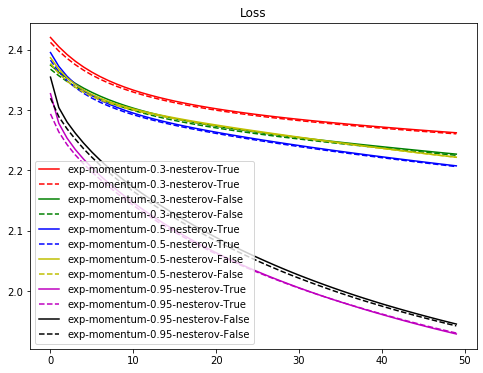

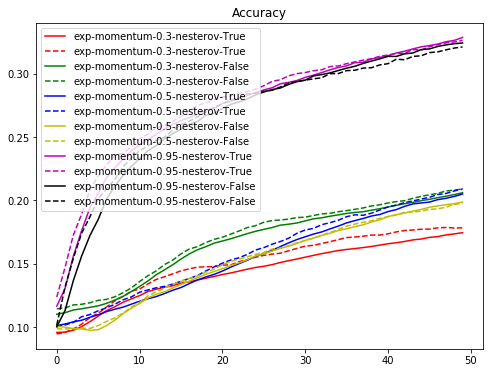

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()